Introduction to Artificial Intelligence - Supervised Learning lab Session Part 1a
--
At the end of this session, you will be able to : 
- Perform basic supervised learning tasks using sklearn.
- Apply supervised learning on PyRat datasets to predict the winner from the start configuration

In [2]:
# The tqdm package is useful to visualize progress with long computations. 
# Install it using pip. 
import tqdm
import numpy as np
import ast
import os
import sys

Basics of machine learning using sklearn
--

sklearn is a very powerful package that implements most machine learning methods. sklearn also includes cross-validation procedures in order to prevent overfitting, many useful metrics and data manipulation techniques that enables very careful experimentations with machine learning. It is also very straightforward to use. We will introduce a few basic concepts of sklearn. 

First, it is very easy to simulate data with sklearn. 

In [3]:
from sklearn.datasets import make_blobs

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution as our tests.

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers is the number of classes. 

Hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function.

In [15]:
### CELL TO BE COMPLETED - Generate blobs.
X, y = make_blobs(100, 2)


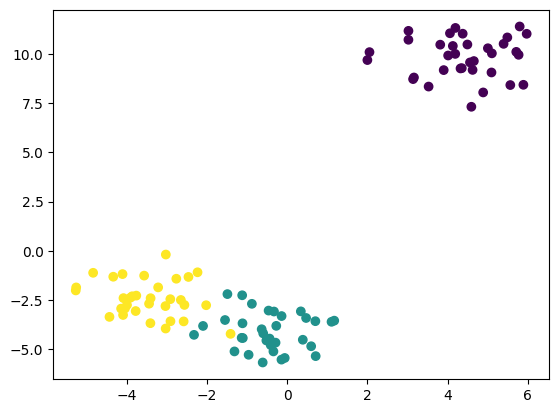

In [18]:
### CELL TO BE COMPLETED - Plot.
### Don't forget to import pyplot and use %matplotlib inline.
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y )

You can use other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment on higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here: 

http://scikit-learn.org/stable/datasets/index.html


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the ability of the model to generalize, we have to split the dataset into a training set and a test set. The test set is the part of the dataset that the model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

In sklearn, you can use the train_test_split function to split datasets.

Try to split the dataset you previously generated (the blobs) into x_train, x_test, y_train, y_test, with 80% in x_train and 20% in x_test. Set random_state = 0 so that the function always returns the same split.

In [21]:
#### CELL TO BE COMPLETED 
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(X, test_size=0.20, random_state=0)
y_train, y_test = train_test_split(y, train_size=0.80, random_state=0)

Check the shapes of the generated vectors.

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this dataset. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

In K-Nearest Neighbor classification (also known as KNN), when you want to predict the class of an object, you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote among its neighbors. In other words, the class of the object is the most common class among its neighbours.

To use a Nearest Neighbor with sklearn, you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score).

In [35]:
### CELL TO BE COMPLETED - Train the classifier and get the accuracy in both sets.
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
classifier.fit(x_train,y_train)
predicted_y = classifier.predict(x_test)
p = classifier.score(x_test,y_test)



In [36]:
p

0.9

Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1-NN classifier always has a bias of 0 (it perfectly classifies the training set) but it has a high variance given that having one more example in the training set can completely change a decision.

Try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time, we advise you to do the same analysis but varying the train/test split size.

In [ ]:
# CELL TO BE COMPLETED - Train networks with varying k.
train_acc_p = list()
test_acc_p = list()  # list storing the test set accuracies
test_ks = range(1,25)  # list containing values of k to be tested

for k in test_ks : 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
    classifier.fit(x_train,y_train)
    test_acc_p.append(classifier.score(x_test,y_test))
    train_acc_p.append(classifier.score(x_train,y_train))


Once your classifier is trained, and bias-variance analysed, it is time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

Print a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both training and test sets.

In the classification report, you are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: Percentage of correctly classified examples with respect to all retrieved examples
* Recall: Percentage of correctly classified examples with respect to all examples belonging to a given class
* F1 Score: Harmonic mean from precision and recall.

In [ ]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.


from sklearn.metrics import classification_report,confusion_matrix


Finally, you are going to plot the decision boundaries of our model. Use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will test our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y, each varying by $h$ and plot it nicely. [Link to the original implementation.](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Predicting the winner in PyRat based on the initial cheese configuration
--

Use the code from lab1 in order to generate a PyRat dataset (X,y) of initial cheese configuration X each corresponding to a label of winner in y. 

The goal of the next part is to perform supervised learning on this dataset using a KNN classifier, as done above. Use the same metrics to estimate the performance of the classifier. 

We suggest that you start with a rather small maze, as the problem gets really high to solve in high dimensions.


In [ ]:
import sys
import numpy as np
sys.path.append("../../session1/lab/")
#to avoid conflict between j notebook and pyrat arguments
sys.argv=['']
del sys

import pyrat
import simulate_matches_2_opponents as simulations
import AI.greedy as greedy_player
import AI.random as random_player

program_1 = greedy_player 
program_2 = greedy_player # You may want to test with the random player.



As for Lab1, you can run several games with the following function, by specifying the number of desired games with `nb_games` and the maze dimensions and number of cheeses

In [ ]:
nb_games = 10

nb_cheese = 4
maze_width = 5
maze_height = 7

cheeses_10_games, winners_10_games = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games, gui = False)

#print(f"Cheeses matrix: {cheeses_10_games}")
print(f"Winners: {winners_10_games}")

You can use the `simulations` function to generate a dataset with the desired nb_cheese and maze dimensions and do more tests. However, as a start, you can also use the datasets we generated for you in Lab1.

In [ ]:
### CELL TO BE COMPLETED 
# Load maze configuration and winners data from Lab1



In [ ]:
### CELL TO BE COMPLETED 
# split dataset in train and test set



In [ ]:
### CELL TO BE COMPLETED 
# train a KNN classifier and test it for different number of neighbors



In [ ]:
### CELL TO BE COMPLETED 
#  Generate the report and confusion matrix for the test set.



Now explore the performances of the KNN classifier with other maze dimentions and number of cheeses..